In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
pd.set_option('display.max_columns', None)

In [171]:
df_raw = pd.read_csv("dropout_rate.csv", sep=";", encoding="utf-8-sig")

In [172]:
df_raw

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Mô tả

Bộ dữ liệu được tạo ra nhằm hỗ trợ giảm tỷ lệ bỏ học và thất bại học tập ở bậc đại học, thông qua việc ứng dụng các kỹ thuật học máy để xác định sinh viên có nguy cơ cao ngay từ giai đoạn đầu của quá trình học. Bộ dữ liệu tạo bởi nhóm Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho. 2021

In [173]:
df_raw.shape

(4424, 37)

In [174]:
df_raw.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Số dòng: 4,424

Số cột: 36

Không có giá trị thiếu (ko null).

# Phân loại

## Qualitative
| Cột | Ý nghĩa |
|---|---|
| Marital Status | Tình trạng hôn nhân: 1 – độc thân, 2 – đã kết hôn, 3 – góa, 4 – ly hôn, 5 – ly thân hợp pháp |
| Application mode | Hình thức nộp hồ sơ (ví dụ: kỳ 1, diện đặc biệt, ưu tiên vùng...) |
| Application order | Mức độ ưu tiên của ngành khi đăng ký (0 là ưu tiên cao nhất) |
| Course | Mã ngành học (ví dụ: 33 - Công nghệ nhiên liệu sinh học, 171 - Đồ họa hoạt hình...) |
| Daytime/evening attendance | Thời gian học: 1 – ban ngày, 0 – buổi tối |
| Previous qualification | Trình độ học vấn trước đó |
| Nacionality | Quốc tịch (được mã hóa) |
| Mother's qualification | Trình độ học vấn của mẹ |
| Father's qualification | Trình độ học vấn của cha |
| Mother's occupation | Nghề nghiệp của mẹ |
| Father's occupation | Nghề nghiệp của cha |
| Displaced | Có phải sống xa nhà không: 1 - Có, 0 - Không |
| Educational special needs | Có nhu cầu giáo dục đặc biệt không: 1 - Có, 0 - Không |
| Debtor | Có nợ học phí không: 1 - Có, 0 - Không |
| Tuition fees up to date | Đã đóng đủ học phí chưa: 1 - Rồi, 0 - Chưa |
| Gender | Giới tính: 1 - Nam, 0 - Nữ |
| Scholarship holder | Có học bổng không: 1 - Có, 0 - Không |
| International | Sinh viên quốc tế: 1 - Có, 0 - Không |
| Target | Kết quả học tập: "Graduate" (tốt nghiệp), "Dropout" (bỏ học), ... |

## Quantitative 

### Discrete

| Cột | Ý nghĩa |
|---|---|
| Age at enrollment | Tuổi khi nhập học |
| Curricular units 1st sem (credited) | Số học phần kỳ 1 được miễn/chuyển điểm |
| Curricular units 1st sem (enrolled) | Số học phần kỳ 1 đã đăng ký |
| Curricular units 1st sem (evaluations) | Số học phần kỳ 1 đã tham gia đánh giá |
| Curricular units 1st sem (approved) | Số học phần kỳ 1 đã qua môn |
| Curricular units 1st sem (without evaluations) | Số học phần kỳ 1 không có điểm đánh giá |
| Curricular units 2nd sem (credited) | Số học phần kỳ 2 được miễn/chuyển điểm |
| Curricular units 2nd sem (enrolled) | Số học phần kỳ 2 đã đăng ký |
| Curricular units 2nd sem (evaluations) | Số học phần kỳ 2 đã tham gia đánh giá |
| Curricular units 2nd sem (approved) | Số học phần kỳ 2 đã qua môn |
| Curricular units 2nd sem (without evaluations) | Số học phần kỳ 2 không có điểm đánh giá |

### Continuous

| Cột | Ý nghĩa |
|---|---|
| Previous qualification (grade) | Điểm số bằng cấp trước đó |
| Admission grade | Điểm đầu vào |
| Curricular units 1st sem (grade) | Điểm trung bình kỳ 1 |
| Curricular units 2nd sem (grade) | Điểm trung bình kỳ 2 |
| Unemployment rate | Tỉ lệ thất nghiệp tại thời điểm đó |
| Inflation rate | Tỉ lệ lạm phát tại thời điểm đó |
| GDP | Tổng sản phẩm quốc nội tại thời điểm đó |


In [175]:
df = df_raw.copy()

summary_stats = {
    "Thông số thống kê": [
        "Mean",
        "Min",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Max",
        "Mode",
        "Variance",
        "Standard Deviation",
        "Coefficient of Variation"
    ]
}

numeric_discrete = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)"
]


for col in numeric_discrete:
    data = df[col]
    mean_val = data.mean()
    std_val = data.std()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    variance_val = data.var()
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    summary_stats[col] = [
        mean_val,
        data.min(),
        data.quantile(0.25),
        data.median(),
        data.quantile(0.75),
        data.max(),
        mode_val,
        variance_val,
        std_val,
        cv_val
    ]

formatted_summary_df = pd.DataFrame(summary_stats).copy()

for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
    formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

formatted_summary_df

,Thông số thống kê,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
0,Mean,23.2651,0.7100,6.2706,8.2991,4.7066,0.1377,0.5418,6.2321,8.0633,4.4358,0.1503
1,Min,17.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,25th Percentile,19.0000,0.0000,5.0000,6.0000,3.0000,0.0000,0.0000,5.0000,6.0000,2.0000,0.0000
3,Median,20.0000,0.0000,6.0000,8.0000,5.0000,0.0000,0.0000,6.0000,8.0000,5.0000,0.0000
4,75th Percentile,25.0000,0.0000,7.0000,10.0000,6.0000,0.0000,0.0000,7.0000,10.0000,6.0000,0.0000
5,Max,70.0000,20.0000,26.0000,45.0000,26.0000,12.0000,19.0000,23.0000,33.0000,20.0000,12.0000
6,Mode,18.0000,0.0000,6.0000,8.0000,6.0000,0.0000,0.0000,6.0000,8.0000,6.0000,0.0000
7,Variance,57.5749,5.5720,6.1513,17.4649,9.5743,0.4773,3.6808,4.8222,15.5863,9.0888,0.5682
8,Standard Deviation,7.5878,2.3605,2.4802,4.1791,3.0942,0.6909,1.9185,2.1960,3.9480,3.0148,0.7538
9,Coefficient of Variation,0.3261,3.3247,0.3955,0.5036,0.6574,5.0188,3.5409,0.3524,0.4896,0.6796,5.0146


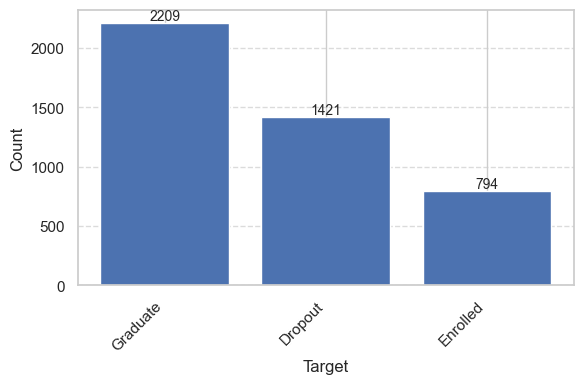

In [176]:
def plot_categorical_distribution_grid(df_raw, columns, cols=2):
    rows = (len(columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

    # Ensure axes is always a flat array
    if isinstance(axes, plt.Axes):
        axes = np.array([axes])
    else:
        axes = np.array(axes).flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        counts = df_raw[col].value_counts()
        bars = ax.bar(counts.index, counts.values)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticks(range(len(counts.index)))
        ax.set_xticklabels(counts.index, rotation=45, ha='right')

    # Remove any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_distribution_grid(df_raw, ['Target', ], cols=1)

Biểu đồ cho thấy phân bổ dữ liệu không đều giữa ba nhóm Target, với số lượng sinh viên tốt nghiệp (Graduate) chiếm tỷ lệ lớn nhất (~50%), tiếp theo là nhóm bỏ học (Dropout, ~32%), và nhóm đang học (Enrolled) chiếm tỷ lệ thấp nhất (~18%). Áp dụng mô hình phân loại, cần cân nhắc sử dụng các kỹ thuật như resampling (oversampling nhóm thiểu số hoặc undersampling nhóm chiếm đa số), hoặc sử dụng trọng số lớp (class weights) để đảm bảo mô hình không bỏ qua các nhóm quan trọng như Dropout.

<Axes: xlabel='Target', ylabel='Curricular units 1st sem (approved)'>

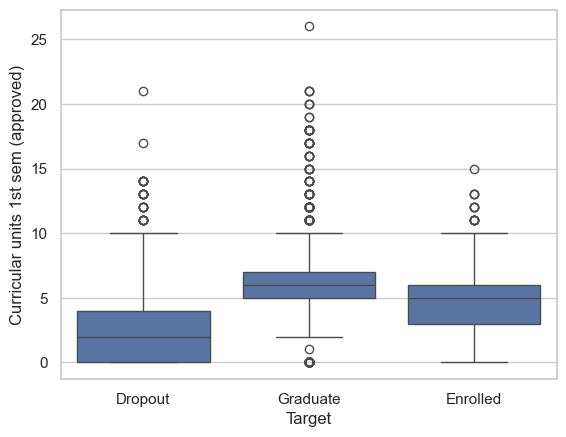

In [177]:
sns.boxplot(x='Target', y='Curricular units 1st sem (approved)', data=df_raw)

<Axes: xlabel='Target', ylabel='Curricular units 2nd sem (approved)'>

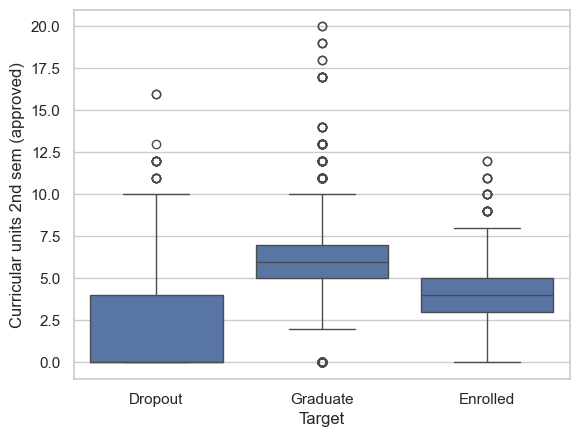

In [178]:
sns.boxplot(x='Target', y='Curricular units 2nd sem (approved)', data=df_raw)

In [179]:
# Số môn đã qua - Năm
df_raw['Curricular units Year'] = df_raw['Curricular units 1st sem (approved)'] + df_raw['Curricular units 2nd sem (approved)']

<Axes: xlabel='Target', ylabel='Curricular units Year'>

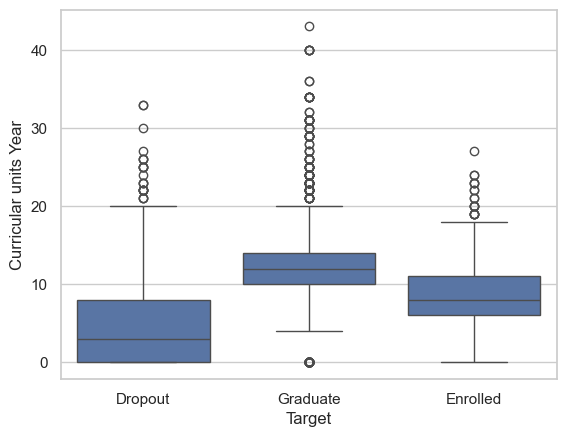

In [180]:

sns.boxplot(x='Target', y='Curricular units Year', data=df_raw)

Ba biểu đồ Boxplot lần lượt thể hiện số học phần đã qua trong học kỳ 1, học kỳ 2 và cả năm học đầu tiên theo ba nhóm sinh viên: Dropout (bỏ học), Graduate (tốt nghiệp) và Enrolled (đang học). Qua việc so sánh ba biểu đồ, có thể rút ra một số nhận định tổng quát và sâu sắc về xu hướng học tập của từng nhóm.

Trước hết, ở cả ba biểu đồ, nhóm Graduate luôn có số lượng học phần đã qua cao nhất, với trung vị lần lượt khoảng 6–7 môn ở mỗi học kỳ và khoảng 13 môn trong cả năm. Phân phối điểm số của nhóm này cũng ổn định hơn, với phần lớn dữ liệu tập trung ở mức cao, thể hiện một nền tảng học tập vững vàng ngay từ năm đầu tiên. Việc duy trì kết quả tốt ở cả hai học kỳ là yếu tố then chốt giúp sinh viên thuộc nhóm này tốt nghiệp đúng hạn.

Ngược lại, nhóm Dropout có số lượng học phần đã qua thấp nhất ở tất cả các biểu đồ. Trong học kỳ 1, trung vị chỉ khoảng 2 môn, tương tự ở học kỳ 2, và tổng số môn của cả năm thường không vượt quá 5. Điều này cho thấy phần lớn sinh viên bỏ học đều gặp khó khăn ngay từ đầu và tình trạng không được cải thiện ở học kỳ sau. Tuy cũng có một vài ngoại lệ với số môn qua cao, nhưng đây chỉ là số ít và có thể liên quan đến các yếu tố ngoài học lực như tài chính hoặc hoàn cảnh cá nhân.

Nhóm Enrolled có đặc điểm trung gian giữa hai nhóm còn lại. Trong cả ba biểu đồ, trung vị của nhóm này thường rơi vào khoảng 4–5 môn mỗi học kỳ, và khoảng 8–9 môn cho cả năm. Điều này cho thấy sự phân hóa rõ rệt trong nhóm sinh viên đang theo học: có những người có tiềm năng tốt nghiệp nhưng cũng có những người đang ở ngưỡng nguy cơ bỏ học nếu không có hỗ trợ kịp thời. Phân phối dữ liệu của nhóm này tương đối rộng, phản ánh mức độ không đồng đều trong kết quả học tập.

Tổng thể, cả ba biểu đồ cho thấy kết quả học tập trong năm đầu tiên – đặc biệt là số học phần đã hoàn thành – có vai trò quyết định đến kết quả học tập cuối cùng của sinh viên. Những sinh viên vượt qua ít môn trong học kỳ đầu thường tiếp tục duy trì kết quả kém và dễ dẫn đến bỏ học. Ngược lại, sinh viên có thành tích tốt ngay từ đầu thường duy trì phong độ và có khả năng tốt nghiệp cao hơn.

<Axes: xlabel='Target', ylabel='Curricular units 1st sem (grade)'>

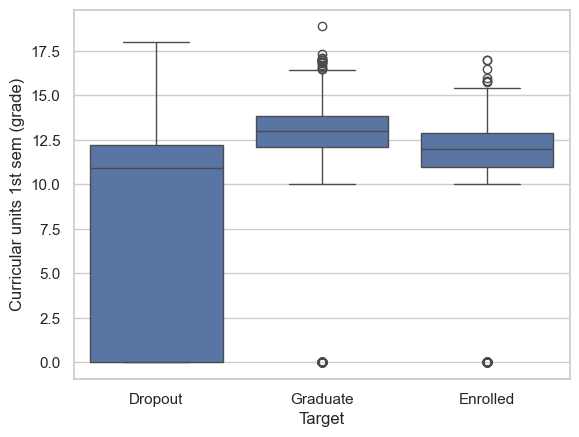

In [181]:
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df_raw)


<Axes: xlabel='Target', ylabel='Curricular units 2nd sem (grade)'>

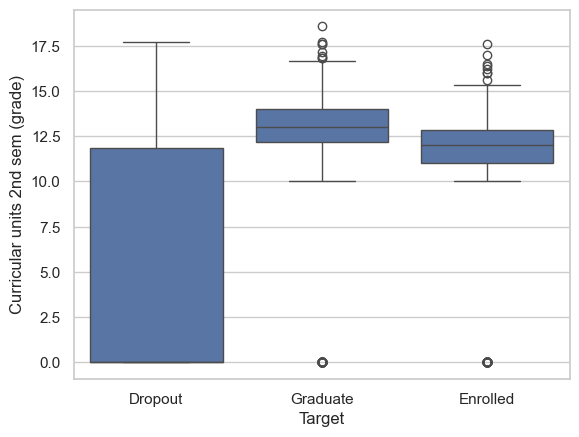

In [182]:
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df_raw)

In [183]:
# Điểm tích lũy - Năm
df_raw['Curricular grade Year'] = df_raw['Curricular units 1st sem (grade)'] + df_raw['Curricular units 2nd sem (grade)']

<Axes: xlabel='Target', ylabel='Curricular grade Year'>

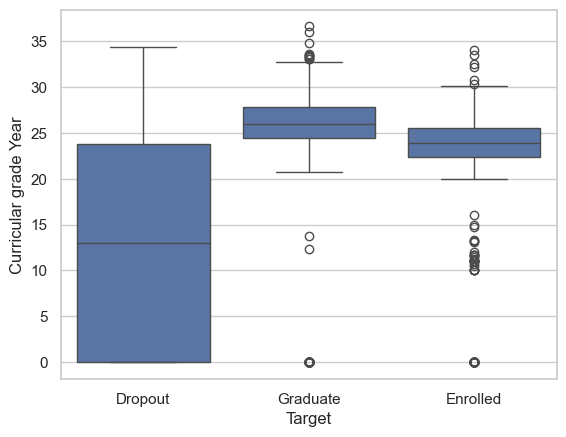

In [184]:
sns.boxplot(x='Target', y='Curricular grade Year', data=df_raw)

Ba biểu đồ Boxplot trên lần lượt thể hiện phân phối điểm trung bình học kỳ 1, học kỳ 2 và cả năm học đầu tiên giữa ba nhóm sinh viên: Dropout (bỏ học), Graduate (tốt nghiệp) và Enrolled (đang học). Dữ liệu thể hiện rất rõ mối liên hệ giữa kết quả học tập và trạng thái học tập cuối cùng của sinh viên.

Ở học kỳ 1 và học kỳ 2, nhóm Graduate luôn có điểm trung bình cao nhất, với trung vị rơi vào khoảng 13–14 điểm, cùng với độ phân tán thấp và ít outlier ở mức thấp. Điều này cho thấy nhóm sinh viên tốt nghiệp thường duy trì được kết quả học tập ổn định, nhất quán qua các kỳ học. Nhóm Enrolled cũng có điểm số tương đối cao, nhưng thấp hơn nhóm tốt nghiệp một chút, và có độ phân tán lớn hơn, thể hiện sự không đồng đều trong quá trình học – một số sinh viên học tốt, nhưng cũng có những người có điểm rất thấp hoặc bằng 0.

Ngược lại, nhóm Dropout có đặc điểm rất dễ nhận thấy: phân phối điểm rất rộng, trung vị thấp (khoảng 11–12 ở mỗi học kỳ), và có nhiều điểm rơi xuống 0. Điều này cho thấy nhiều sinh viên bỏ học có kết quả học tập rất yếu trong cả hai học kỳ. Đặc biệt, ở biểu đồ tổng điểm cả năm (Curricular grade Year), nhóm Dropout có sự chênh lệch rất lớn so với hai nhóm còn lại. Trung vị của nhóm này chỉ vào khoảng 12–13 điểm, trong khi nhóm tốt nghiệp đạt mức 27–28, tức gấp đôi.

Tóm lại, điểm trung bình của sinh viên trong cả năm đầu tiên – đặc biệt là điểm trung bình cộng dồn từ cả hai học kỳ – là một chỉ báo mạnh về khả năng bỏ học hay tốt nghiệp. Sinh viên có điểm thấp ngay từ đầu có nguy cơ cao rơi vào nhóm Dropout


<Axes: xlabel='Target', ylabel='Age at enrollment'>

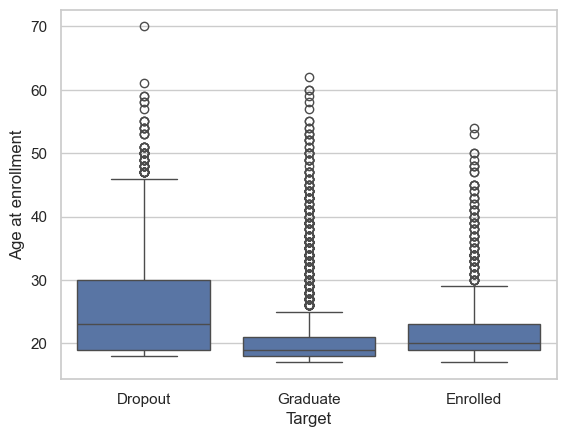

In [185]:
sns.boxplot(x='Target', y='Age at enrollment', data=df_raw)

Biểu đồ Boxplot thể hiện phân bố độ tuổi khi nhập học theo ba nhóm sinh viên: Dropout (bỏ học), Graduate (tốt nghiệp) và Enrolled (đang học). Từ biểu đồ, có thể nhận thấy sự khác biệt rõ rệt giữa các nhóm, đặc biệt là về độ tuổi trung vị và mức độ phân tán.

Nhóm Dropout có độ tuổi nhập học cao hơn đáng kể so với hai nhóm còn lại. Trung vị của nhóm này rơi vào khoảng 24 tuổi, và dữ liệu có độ phân tán lớn, với nhiều điểm ngoại lệ lên tới 60 hoặc thậm chí 70 tuổi. Điều này cho thấy rằng sinh viên lớn tuổi hơn có xu hướng bỏ học cao hơn, có thể do các yếu tố như áp lực tài chính, gia đình, công việc hoặc khó khăn trong việc quay lại môi trường học tập sau thời gian gián đoạn.

Ngược lại, nhóm Graduate và Enrolled có độ tuổi nhập học thấp và tương đối ổn định, chủ yếu tập trung trong khoảng từ 18 đến 22 tuổi. Trung vị của hai nhóm này gần như trùng nhau, cho thấy phần lớn sinh viên tốt nghiệp hoặc đang tiếp tục học đều là những người nhập học ngay sau khi hoàn thành bậc phổ thông.

<Axes: xlabel='Target', ylabel='Curricular units failed Year'>

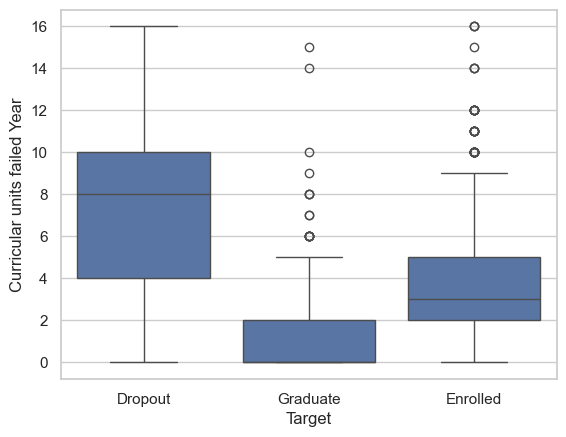

In [201]:
df_raw['Curricular units failed Year'] = df_raw['Curricular units 1st sem (enrolled)'] + df_raw['Curricular units 2nd sem (enrolled)'] - df_raw['Curricular units Year']
sns.boxplot(x='Target', y='Curricular units failed Year', data=df_raw)

Nhóm Dropout có số môn trượt cao nhất, với trung vị khoảng 8 môn, và phân bố rất rộng, dao động từ 0 đến trên 16 môn. Điều này cho thấy trượt nhiều môn có thể là một dấu hiệu sớm của nguy cơ bỏ học.

<Axes: xlabel='Target', ylabel='Admission grade'>

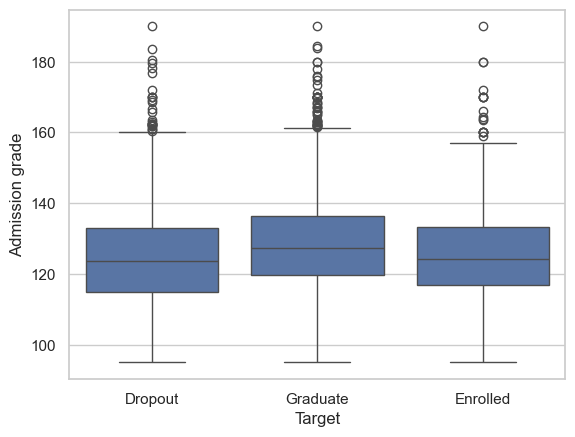

In [200]:
sns.boxplot(x='Target', y='Admission grade', data=df_raw)

<Axes: xlabel='Target', ylabel='Unemployment rate'>

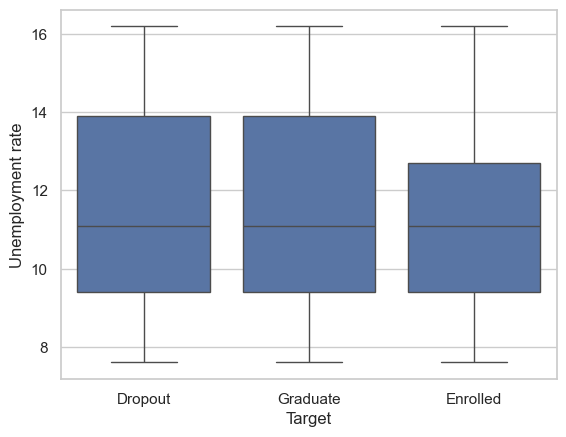

In [188]:
sns.boxplot(x='Target', y='Unemployment rate', data=df_raw)


<Axes: xlabel='Target', ylabel='Inflation rate'>

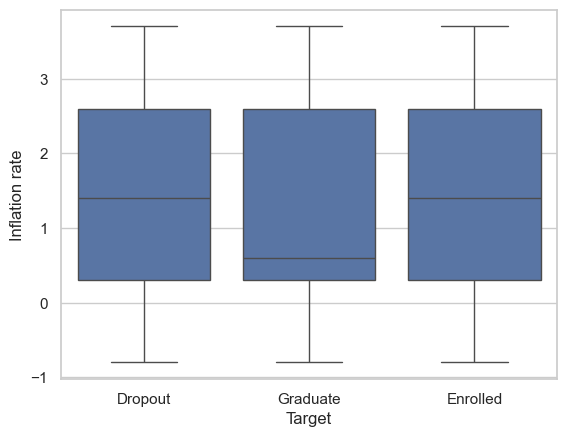

In [189]:
sns.boxplot(x='Target', y='Inflation rate', data=df_raw)

<Axes: xlabel='Target', ylabel='GDP'>

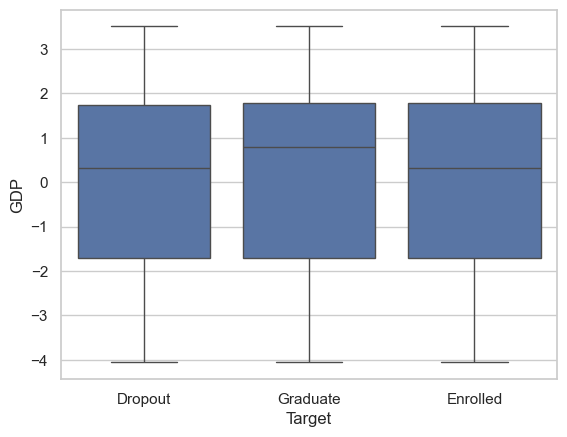

In [190]:
sns.boxplot(x='Target', y='GDP', data=df_raw)

Không có sự khác biệt đáng kể giữa các nhãn target 

C:\Users\PC\AppData\Local\Temp\ipykernel_30676\3155642557.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cramér's V", y=cramer_df.index, data=cramer_df, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_30676\3155642557.py:33: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


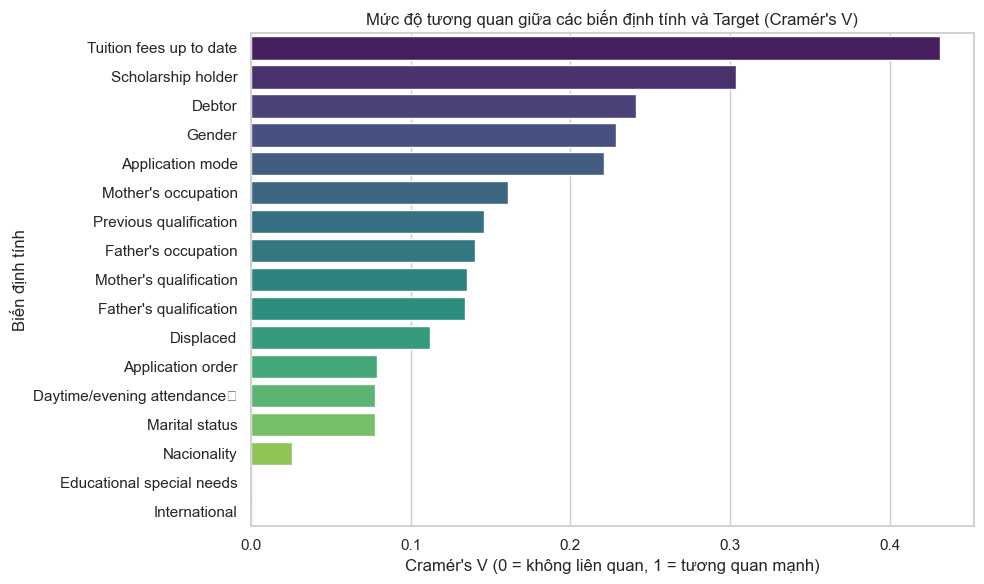

In [191]:
qual_cols = [
    'Marital status', 'Application mode', 'Application order',
    'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced',
    'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_results = {}
for col in qual_cols:
    cramer_results[col] = cramers_v(df_raw[col], df_raw['Target'])

cramer_df = pd.DataFrame.from_dict(cramer_results, orient='index', columns=["Cramér's V"])
cramer_df = cramer_df.sort_values(by="Cramér's V", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Cramér's V", y=cramer_df.index, data=cramer_df, palette="viridis")
plt.title("Mức độ tương quan giữa các biến định tính và Target (Cramér's V)")
plt.xlabel("Cramér's V (0 = không liên quan, 1 = tương quan mạnh)")
plt.ylabel("Biến định tính")
plt.tight_layout()
plt.show()

Biểu đồ cho thấy một số biến định tính có mối liên hệ đáng kể với biến mục tiêu Target. Đáng chú ý nhất là biến Tuition fees up to date, có hệ số Cramér's V cao nhất (~0.43), cho thấy việc đóng học phí đúng hạn có liên quan mạnh đến khả năng tốt nghiệp hay bỏ học. Tiếp theo là các biến Scholarship holder, Debtor, và Gender, cũng có mức tương quan khá rõ rệt (Cramér's V từ ~0.22–0.28), phản ánh rằng các yếu tố tài chính và giới tính có thể ảnh hưởng đáng kể đến kết quả học tập của sinh viên. Những biến như Nationality, Educational special needs, và International có mức tương quan rất thấp, gần như không có mối liên hệ rõ ràng với kết quả học tập.

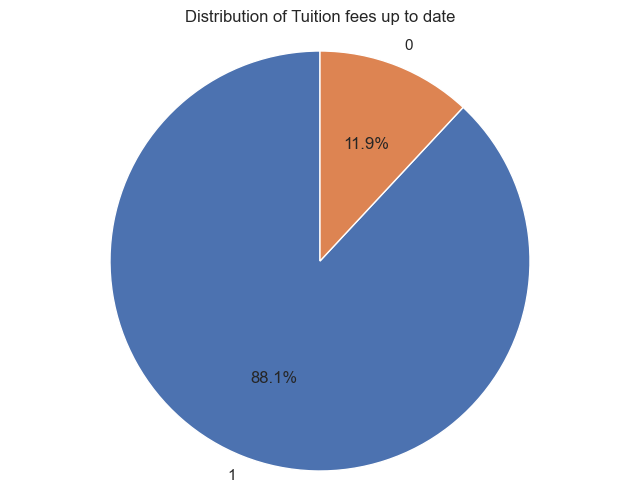

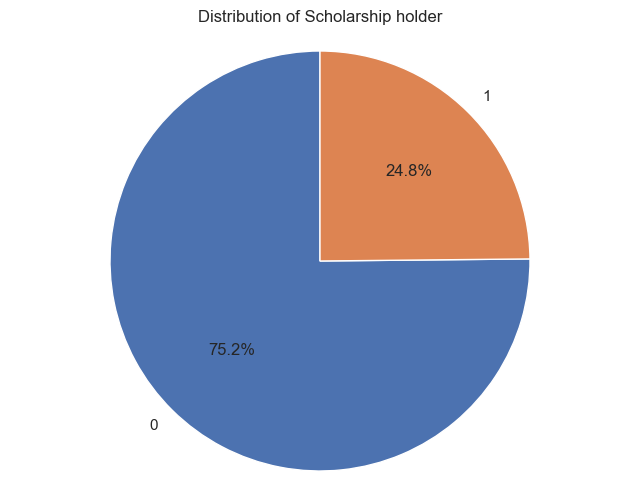

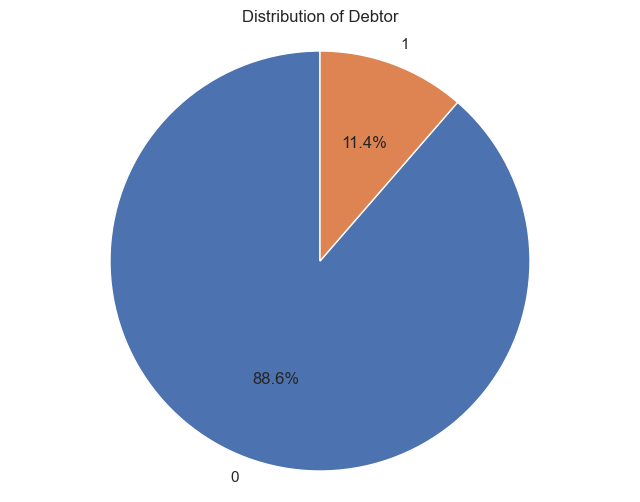

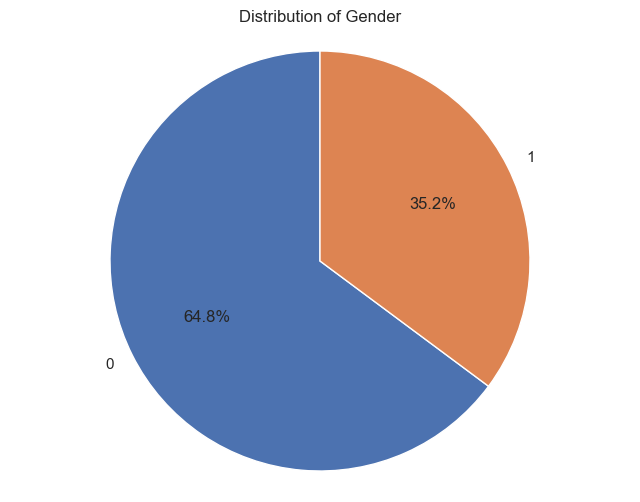

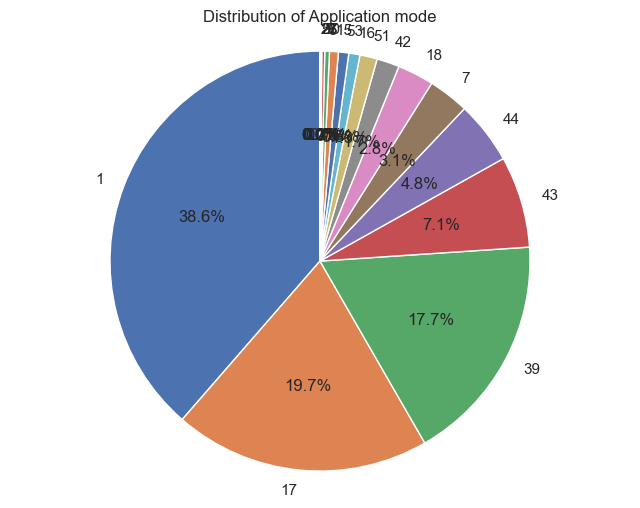

In [192]:

piechart_cols = [
    "Tuition fees up to date",
    "Scholarship holder",
    "Debtor",
    "Gender",
    "Application mode",
]

for col in piechart_cols:
    counts = df_raw[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [193]:
def plot_heatmap_by_target(df, col1, col2, normalize='index'):
    ct = pd.crosstab(df[col1], df[col2], normalize=normalize)
    plt.figure(figsize=(7, 4))
    sns.heatmap(
        ct,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Tỷ lệ' if normalize else 'Số lượng'}
    )
    plt.title(f"Heatmap: {col1} vs {col2}")
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()

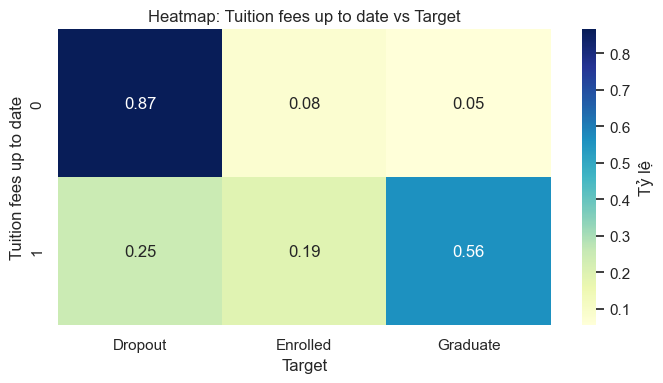

In [194]:
plot_heatmap_by_target(df_raw, 'Tuition fees up to date', 'Target')

Biểu đồ heatmap cho thấy sinh viên chưa đóng học phí có tỷ lệ bỏ học rất cao (87%), trong khi chỉ 5% trong nhóm này tốt nghiệp. Điều này cho thấy việc đóng học phí đúng hạn có mối liên hệ chặt chẽ với khả năng hoàn thành chương trình học.

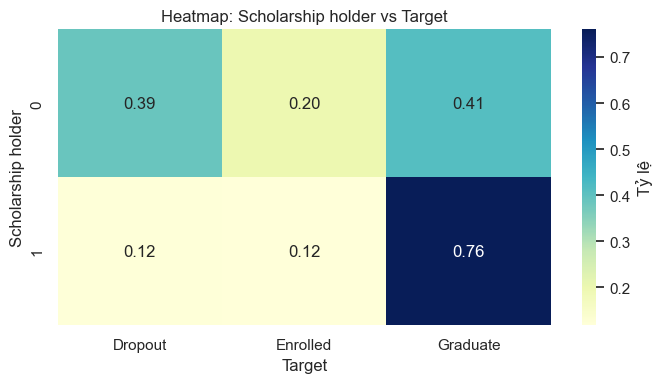

In [195]:
plot_heatmap_by_target(df_raw, 'Scholarship holder', 'Target')

Biểu đồ cho thấy sinh viên có học bổng có tỷ lệ tốt nghiệp rất cao (76%) và tỷ lệ bỏ học thấp (12%). Trong khi đó, sinh viên không có học bổng có tỷ lệ tốt nghiệp và bỏ học gần như ngang nhau (41% và 39%). Điều này gợi ý rằng học bổng có thể là yếu tố hỗ trợ tích cực giúp sinh viên duy trì và hoàn thành chương trình học.


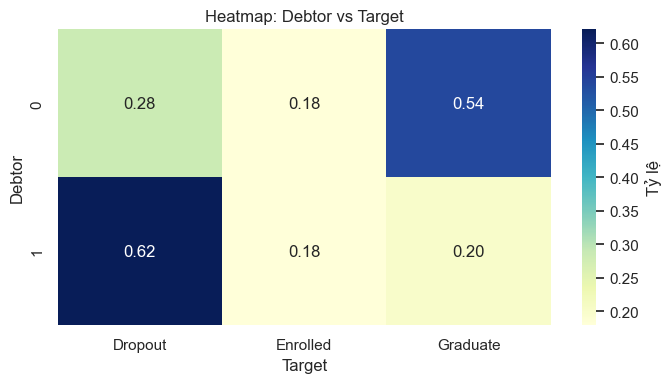

In [196]:
plot_heatmap_by_target(df_raw, 'Debtor', 'Target')

Biểu đồ heatmap cho thấy sinh viên có nợ (Debtor = 1) có tỷ lệ bỏ học cao (62%) và tỷ lệ tốt nghiệp thấp (20%). Ngược lại, sinh viên không có nợ có tỷ lệ tốt nghiệp cao hơn (54%) và tỷ lệ bỏ học thấp hơn (28%). Điều này cho thấy tình trạng tài chính, thể hiện qua việc nợ học phí, có thể là một yếu tố quan trọng ảnh hưởng đến khả năng hoàn thành chương trình học.


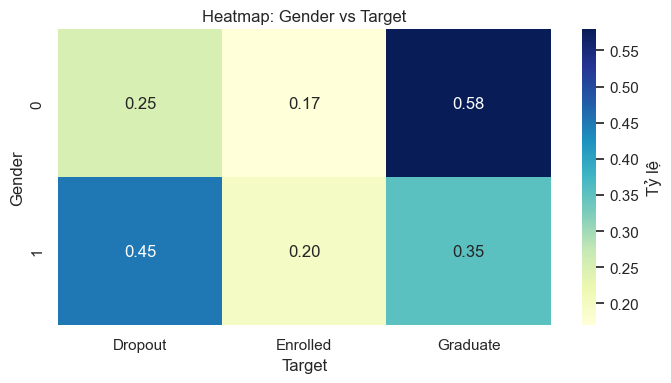

In [197]:
plot_heatmap_by_target(df_raw, 'Gender', 'Target')

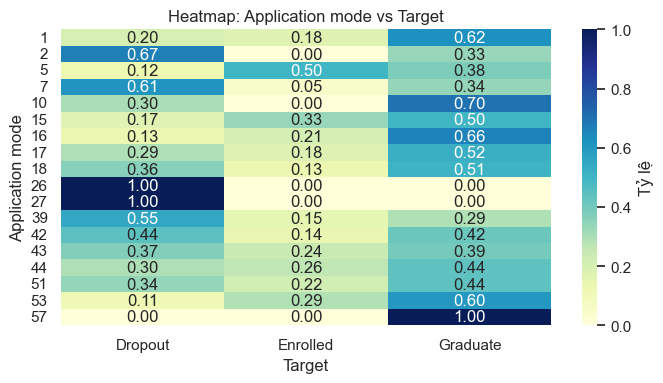

In [198]:
plot_heatmap_by_target(df_raw, 'Application mode', 'Target')

Biểu đồ heatmap cho thấy Application mode (phương thức đăng ký tuyển sinh) có ảnh hưởng đáng kể đến kết quả học tập. Một số mã mode như 27, 26, 7, 2 có tỷ lệ bỏ học cực cao (100% hoặc gần 70%), trong khi các mã như 57, 53, 10 lại có tỷ lệ tốt nghiệp rất cao (trên 60%, thậm chí 100%). Điều này cho thấy cách thức nộp đơn đầu vào có thể phản ánh phần nào mức độ sẵn sàng hoặc phù hợp của sinh viên với chương trình học, và nên được cân nhắc kỹ trong quá trình tuyển sinh và hỗ trợ.
